In [1]:
from datetime import datetime, timedelta
from kerykeion import (
    TransitsTimeRangeFactory,
    EphemerisDataFactory,
    AstrologicalSubject,
)

In [76]:
person = AstrologicalSubject(
    "n", 2001, 6, 8, 14, 40, "Moscow", "RU"
)

********
NO GEONAMES USERNAME SET!
Using the default geonames username is not recommended, please set a custom one!
You can get one for free here:
https://www.geonames.org/login
Keep in mind that the default username is limited to 2000 requests per hour and is shared with everyone else using this library.
********


In [77]:
start_date = datetime.now()
end_date = datetime.now() + timedelta(days=30)

In [78]:
ephemeris_factory = EphemerisDataFactory(
    start_datetime=start_date,
    end_datetime=end_date,
    step_type="days",
    step=1,
    lat=person.lat,
    lng=person.lng,
    tz_str=person.tz_str,
)

In [79]:
ephemeris_data_points = ephemeris_factory.get_ephemeris_data_as_astrological_subjects()

In [80]:
transit_factory = TransitsTimeRangeFactory(
    natal_chart=person,
    ephemeris_data_points=ephemeris_data_points,
)

transit_results = transit_factory.get_transit_moments()

In [81]:
print(transit_results.model_dump()["dates"][2])
print(transit_results.model_dump()["transits"][2]['date'])
print(transit_results.model_dump()["transits"][2]['aspects'][0])

2025-05-16T12:59:00+00:00
2025-05-16T12:59:00+00:00
{'p1_name': 'Sun', 'p1_owner': 'Now', 'p1_abs_pos': 55.91003460730936, 'p2_name': 'Saturn', 'p2_owner': 'n', 'p2_abs_pos': 66.15599463665882, 'aspect': 'conjunction', 'orbit': 10.245960029349476, 'aspect_degrees': 0, 'diff': 10.245960029349455, 'p1': 0, 'p2': 6}


In [82]:
from datetime import datetime
from kerykeion.ephemeris_data import EphemerisDataFactory

start_date = datetime.fromisoformat("2025-01-01")
end_date = datetime.fromisoformat("2025-01-02")

factory = EphemerisDataFactory(
    start_datetime=start_date,
    end_datetime=end_date,
    step_type="minutes",
    step=5,
    tz_str="Europe/Moscow",
    is_dst=False,
)



In [83]:
ephemeris_data = factory.get_ephemeris_data(as_model=True)
print(ephemeris_data[0])
print(len(ephemeris_data))

date='2025-01-01T00:00:00' planets=[KerykeionPointModel(name='Sun', quality='Cardinal', element='Earth', sign='Cap', sign_num=9, position=10.686153877059667, abs_pos=280.68615387705967, emoji='♑️', point_type='Planet', house='Fifth_House', retrograde=False), KerykeionPointModel(name='Moon', quality='Cardinal', element='Earth', sign='Cap', sign_num=9, position=22.23447469279745, abs_pos=292.23447469279745, emoji='♑️', point_type='Planet', house='Fifth_House', retrograde=False), KerykeionPointModel(name='Mercury', quality='Mutable', element='Fire', sign='Sag', sign_num=8, position=19.70938248761155, abs_pos=259.70938248761155, emoji='♐️', point_type='Planet', house='Fourth_House', retrograde=False), KerykeionPointModel(name='Venus', quality='Fixed', element='Air', sign='Aqu', sign_num=10, position=27.577860343686723, abs_pos=327.5778603436867, emoji='♒️', point_type='Planet', house='Sixth_House', retrograde=False), KerykeionPointModel(name='Mars', quality='Fixed', element='Fire', sign='L

In [84]:
ephemeris_data

[EphemerisDictModel(date='2025-01-01T00:00:00', planets=[KerykeionPointModel(name='Sun', quality='Cardinal', element='Earth', sign='Cap', sign_num=9, position=10.686153877059667, abs_pos=280.68615387705967, emoji='♑️', point_type='Planet', house='Fifth_House', retrograde=False), KerykeionPointModel(name='Moon', quality='Cardinal', element='Earth', sign='Cap', sign_num=9, position=22.23447469279745, abs_pos=292.23447469279745, emoji='♑️', point_type='Planet', house='Fifth_House', retrograde=False), KerykeionPointModel(name='Mercury', quality='Mutable', element='Fire', sign='Sag', sign_num=8, position=19.70938248761155, abs_pos=259.70938248761155, emoji='♐️', point_type='Planet', house='Fourth_House', retrograde=False), KerykeionPointModel(name='Venus', quality='Fixed', element='Air', sign='Aqu', sign_num=10, position=27.577860343686723, abs_pos=327.5778603436867, emoji='♒️', point_type='Planet', house='Sixth_House', retrograde=False), KerykeionPointModel(name='Mars', quality='Fixed', el

In [85]:
ephemeris_data[0].planets

[KerykeionPointModel(name='Sun', quality='Cardinal', element='Earth', sign='Cap', sign_num=9, position=10.686153877059667, abs_pos=280.68615387705967, emoji='♑️', point_type='Planet', house='Fifth_House', retrograde=False),
 KerykeionPointModel(name='Moon', quality='Cardinal', element='Earth', sign='Cap', sign_num=9, position=22.23447469279745, abs_pos=292.23447469279745, emoji='♑️', point_type='Planet', house='Fifth_House', retrograde=False),
 KerykeionPointModel(name='Mercury', quality='Mutable', element='Fire', sign='Sag', sign_num=8, position=19.70938248761155, abs_pos=259.70938248761155, emoji='♐️', point_type='Planet', house='Fourth_House', retrograde=False),
 KerykeionPointModel(name='Venus', quality='Fixed', element='Air', sign='Aqu', sign_num=10, position=27.577860343686723, abs_pos=327.5778603436867, emoji='♒️', point_type='Planet', house='Sixth_House', retrograde=False),
 KerykeionPointModel(name='Mars', quality='Fixed', element='Fire', sign='Leo', sign_num=4, position=1.958

In [86]:
ascendant_data = None

if hasattr(ephemeris_data[0], 'planets'):
    for point in ephemeris_data[0].planets:
        if hasattr(point, 'name') and point.name == 'Ascendant':
            ascendant_data = point
            break

In [87]:
if ascendant_data:
    print(f"Асцендент: {ascendant_data.sign} {ascendant_data.position:.2f}°")
    print(f"Полные данные по Асценденту: {ascendant_data}")
else:
    print("Данные по Асценденту не найдены.")

Асцендент: Vir 5.92°
Полные данные по Асценденту: name='Ascendant' quality='Mutable' element='Earth' sign='Vir' sign_num=5 position=5.916510316862571 abs_pos=155.91651031686257 emoji='♍️' point_type='AxialCusps' house='First_House' retrograde=False


In [88]:
all_asc = []

for daily_data in ephemeris_data:
    asc_for_day = None
    #print(daily_data)
    if hasattr(daily_data, 'planets'):
        for point in daily_data.planets:
        
            if hasattr(point, 'name') and point.name == 'Ascendant':
                asc_for_day = point
                print(point)
                break

    if asc_for_day:
        all_asc.append({
            "date": daily_data.date,  # Сохраняем дату для контекста
                "ascendant_sign": asc_for_day.sign,
                "ascendant_position": asc_for_day.position,
                "ascendant_absolute_position": asc_for_day.abs_pos,
                "full_asc_data": asc_for_day # Можно сохранить весь объект если нужно
            })
    else:
            # Если Асцендент не найден для какой-то даты, можно добавить None или специальный маркер
            all_asc.append({
                "date": daily_data.date,
                "ascendant_sign": None,
                "ascendant_position": None,
                "ascendant_absolute_position": None,
                "full_asc_data": None
            })

name='Ascendant' quality='Mutable' element='Earth' sign='Vir' sign_num=5 position=5.916510316862571 abs_pos=155.91651031686257 emoji='♍️' point_type='AxialCusps' house='First_House' retrograde=False
name='Ascendant' quality='Mutable' element='Earth' sign='Vir' sign_num=5 position=6.794684942897959 abs_pos=156.79468494289796 emoji='♍️' point_type='AxialCusps' house='First_House' retrograde=False
name='Ascendant' quality='Mutable' element='Earth' sign='Vir' sign_num=5 position=7.673197441910958 abs_pos=157.67319744191096 emoji='♍️' point_type='AxialCusps' house='First_House' retrograde=False
name='Ascendant' quality='Mutable' element='Earth' sign='Vir' sign_num=5 position=8.55205302076422 abs_pos=158.55205302076422 emoji='♍️' point_type='AxialCusps' house='First_House' retrograde=False
name='Ascendant' quality='Mutable' element='Earth' sign='Vir' sign_num=5 position=9.43125526605425 abs_pos=159.43125526605425 emoji='♍️' point_type='AxialCusps' house='First_House' retrograde=False
name='A

In [89]:
all_asc

[{'date': '2025-01-01T00:00:00',
  'ascendant_sign': 'Vir',
  'ascendant_position': 5.916510316862571,
  'ascendant_absolute_position': 155.91651031686257,
  'full_asc_data': KerykeionPointModel(name='Ascendant', quality='Mutable', element='Earth', sign='Vir', sign_num=5, position=5.916510316862571, abs_pos=155.91651031686257, emoji='♍️', point_type='AxialCusps', house='First_House', retrograde=False)},
 {'date': '2025-01-01T00:05:00',
  'ascendant_sign': 'Vir',
  'ascendant_position': 6.794684942897959,
  'ascendant_absolute_position': 156.79468494289796,
  'full_asc_data': KerykeionPointModel(name='Ascendant', quality='Mutable', element='Earth', sign='Vir', sign_num=5, position=6.794684942897959, abs_pos=156.79468494289796, emoji='♍️', point_type='AxialCusps', house='First_House', retrograde=False)},
 {'date': '2025-01-01T00:10:00',
  'ascendant_sign': 'Vir',
  'ascendant_position': 7.673197441910958,
  'ascendant_absolute_position': 157.67319744191096,
  'full_asc_data': KerykeionPo

In [90]:
for asc_info in all_asc:
    if asc_info["ascendant_sign"]:
        print(f"Дата: {asc_info['date']}, Асцендент: {asc_info['ascendant_sign']} {asc_info['ascendant_position']:.2f}°")
    else:
        print(f"Дата: {asc_info['date']}, Асцендент: не найден")

Дата: 2025-01-01T00:00:00, Асцендент: Vir 5.92°
Дата: 2025-01-01T00:05:00, Асцендент: Vir 6.79°
Дата: 2025-01-01T00:10:00, Асцендент: Vir 7.67°
Дата: 2025-01-01T00:15:00, Асцендент: Vir 8.55°
Дата: 2025-01-01T00:20:00, Асцендент: Vir 9.43°
Дата: 2025-01-01T00:25:00, Асцендент: Vir 10.31°
Дата: 2025-01-01T00:30:00, Асцендент: Vir 11.19°
Дата: 2025-01-01T00:35:00, Асцендент: Vir 12.07°
Дата: 2025-01-01T00:40:00, Асцендент: Vir 12.95°
Дата: 2025-01-01T00:45:00, Асцендент: Vir 13.83°
Дата: 2025-01-01T00:50:00, Асцендент: Vir 14.71°
Дата: 2025-01-01T00:55:00, Асцендент: Vir 15.60°
Дата: 2025-01-01T01:00:00, Асцендент: Vir 16.48°
Дата: 2025-01-01T01:05:00, Асцендент: Vir 17.36°
Дата: 2025-01-01T01:10:00, Асцендент: Vir 18.24°
Дата: 2025-01-01T01:15:00, Асцендент: Vir 19.12°
Дата: 2025-01-01T01:20:00, Асцендент: Vir 20.01°
Дата: 2025-01-01T01:25:00, Асцендент: Vir 20.89°
Дата: 2025-01-01T01:30:00, Асцендент: Vir 21.77°
Дата: 2025-01-01T01:35:00, Асцендент: Vir 22.66°
Дата: 2025-01-01T01:40:00

In [91]:
all_asc = []

for daily_data in ephemeris_data:
    asc_for_day = None
    #print(daily_data)
    if hasattr(daily_data, 'planets'):
        for point in daily_data.planets:
        
            if hasattr(point, 'name') and point.name == 'Ascendant':
                asc_for_day = point
                print(point)
                break
    
        new_sign = asc_for_day.sign

        if current_sign is None:
            

_IncompleteInputError: incomplete input (2189543909.py, line 17)

In [48]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached numpy-2.2.5-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached numpy-2

In [49]:
!pip install pytz


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [63]:
from datetime import datetime, timedelta, time
from kerykeion import EphemerisDataFactory, AstrologicalSubject
#from kerykeion.config import SIGN_COLORS # Цвета знаков
#from kerykeion.utilities.zodiac_signs_unicode import ZODIAC_SIGN_UNICODE # Символы знаков
import matplotlib.pyplot as plt
import pytz # Для работы с часовыми поясами

# --- Шаг 1: Подготовка ---
# Выберите дату (например, сегодня или любая другая)
target_date_str = "2002-9-6" # Пример даты, измените на нужную
target_date = datetime.strptime(target_date_str, "%Y-%m-%d").date()

# Используем данные из вашего объекта 'person' или задаем новые
# Если объект person существует из предыдущих ячеек:
# lat = person.lat
# lng = person.lng
# tz_str = person.tz_str
# Если нет, задайте их здесь:
lat = 55.75  # Москва, широта
lng = 49   # Москва, долгота
tz_str = "Europe/Moscow" # Часовой пояс

# Определяем начало и конец дня в выбранном часовом поясе
timezone = pytz.timezone(tz_str)
day_start_utc = timezone.localize(datetime.combine(target_date, time.min)).astimezone(pytz.utc)
day_end_utc = timezone.localize(datetime.combine(target_date, time.max)).astimezone(pytz.utc)

# --- Шаг 2: Сбор данных эфемерид ---
# Рассчитываем с шагом в 1 минуту для достаточной точности
ephemeris_factory = EphemerisDataFactory(
    start_datetime=day_start_utc,
    end_datetime=day_end_utc,
    step_type="minutes",
    step=1,
    lat=lat,
    lng=lng,
    # tz_str можно не указывать, если start_datetime и end_datetime уже в UTC
    # но kerykeion ожидает его для правильного расчета домов/ASC для конкретного места.
    # Однако, для ASC расчет идет на основе местного времени, которое потом конвертируется в UTC для эфемерид.
    # Чтобы избежать путаницы, лучше передавать UTC и tz_str для корректного преобразования Kerykeion.
    # Kerykeion (в частности, Swiss Ephemeris) обычно работает с UTC для расчетов,
    # а местное время используется для определения UTC момента.
    # Если мы хотим эфемериды "для местного времени", то Kerykeion это учитывает при расчете ASC.
    # Давайте используем start_datetime и end_datetime в местном времени, а tz_str укажет Kerykeion, как это интерпретировать.
)

# Пересоздадим factory с локальными start/end, как в вашем ноутбуке
local_day_start = datetime.combine(target_date, time.min)
local_day_end = datetime.combine(target_date, time.max) # до 23:59:59.999999

ephemeris_factory = EphemerisDataFactory(
    start_datetime=local_day_start,
    end_datetime=local_day_end, # Kerykeion обработает это как конец дня
    step_type="minutes",
    step=1, # Шаг в 1 минуту
    lat=lat,
    lng=lng,
    tz_str=tz_str,
)

print(f"Расчет эфемерид для {target_date_str} ({tz_str}) с {local_day_start.strftime('%H:%M:%S')} до {local_day_end.strftime('%H:%M:%S')}...")
ephemeris_data_points = ephemeris_factory.get_ephemeris_data(as_model=True)
print(f"Получено {len(ephemeris_data_points)} точек данных.")

# --- Шаг 3 и 4: Обработка данных, определение транзитов и длительности ---
asc_transits = []
current_sign = None
current_sign_start_time_dt = None

if not ephemeris_data_points:
    print("Не удалось получить данные эфемерид.")
else:
    for i, data_point in enumerate(ephemeris_data_points):
        timestamp_str = data_point.date # e.g., "2024-07-30T00:00:00"
        # Kerykeion возвращает дату-время как строку в локальном времени, указанном в tz_str
        # Преобразуем в datetime объект (будет naive, но представляет локальное время)
        timestamp_dt = datetime.fromisoformat(timestamp_str)

        asc_object = None
        for p in data_point.planets:
            if p.name == 'Ascendant':
                asc_object = p
                break
        
        if not asc_object:
            #print(f"Асцендент не найден для {timestamp_str}")
            continue

        new_sign = asc_object.sign # e.g., "Ari", "Tau"

        if current_sign is None: # Самая первая точка данных
            current_sign = new_sign
            current_sign_start_time_dt = timestamp_dt
        elif new_sign != current_sign:
            # Знак изменился, фиксируем окончание предыдущего транзита
            # и начало нового
            duration = timestamp_dt - current_sign_start_time_dt
            asc_transits.append({
                "sign": current_sign,
                "start_time": current_sign_start_time_dt,
                "end_time": timestamp_dt, # Конец - это начало следующего
                "duration": duration,
                "duration_readable": str(duration)
            })
            current_sign = new_sign
            current_sign_start_time_dt = timestamp_dt
        
        # Обработка последнего элемента в цикле
        if i == len(ephemeris_data_points) - 1:
            if current_sign is not None and current_sign_start_time_dt is not None:
                 # Конец последнего транзита - это время последней точки данных
                 # или конец дня (23:59:59). Используем timestamp_dt последней точки.
                duration = timestamp_dt - current_sign_start_time_dt + timedelta(minutes=1) # Добавляем длительность последнего интервала
                # Более точно: конец дня - это local_day_end
                # duration = (datetime.combine(target_date, time(23,59,59)) if timestamp_dt.time() < time(23,59,59) else timestamp_dt) - current_sign_start_time_dt
                #  Проще всего - время последней точки в данных, т.к. factory доходит до local_day_end
                
                # end_time для последнего сегмента будет время последней точки + шаг (если шаг покрывает до конца дня)
                # или просто время последней точки.
                # Для графика, последняя точка данных и есть конец последнего сегмента на этот момент.
                # Если мы хотим, чтобы график заканчивался ровно в 23:59:59, то:
                true_end_of_day_for_last_segment = datetime.combine(target_date, time(23, 59, 59))
                # Гарантируем, что end_time не выходит за пределы дня
                final_end_time = min(timestamp_dt + timedelta(minutes=ephemeris_factory.step), true_end_of_day_for_last_segment)
                # Если timestamp_dt уже 23:59:00, то final_end_time будет 23:59:59
                # Но Kerykeion при step=1 и end_datetime=time.max уже дает последнюю точку в 23:59:00
                # Значит, длительность последнего отрезка до конца 23:59:xx
                
                # Пусть end_time последнего сегмента будет временем последней точки данных + 1 минута (если шаг 1 минута)
                # или до 23:59:59 этого дня
                
                end_of_day_dt = timezone.localize(datetime.combine(target_date, time(23, 59, 59, 999999)))
                # Переведем в "наивное" локальное для согласованности с timestamp_dt
                end_of_day_naive_local = end_of_day_dt.replace(tzinfo=None)

                duration = end_of_day_naive_local - current_sign_start_time_dt

                asc_transits.append({
                    "sign": current_sign,
                    "start_time": current_sign_start_time_dt,
                    "end_time": end_of_day_naive_local, # Конец дня
                    "duration": duration,
                    "duration_readable": str(duration)
                })

# --- Шаг 5: Вывод информации в виде таблицы ---
print(f"\n--- ASC for {target_date_str} ({tz_str}) ---")
total_duration_check = timedelta()
for transit in asc_transits:
    print(
        f"Sign:  {transit['sign']:<4} "
        f"Start: {transit['start_time'].strftime('%H:%M:%S')}   "
        f"End: {transit['end_time'].strftime('%H:%M:%S')}   "
        f"Duration: {transit['duration_readable']}"
    )
    total_duration_check += transit['duration']
print(f"Check full duration: {total_duration_check}")



Расчет эфемерид для 2002-9-6 (Europe/Moscow) с 00:00:00 до 23:59:59...
Получено 1440 точек данных.

--- ASC for 2002-9-6 (Europe/Moscow) ---
Sign:  Can  Start: 00:00:00   End: 01:44:00   Duration: 1:44:00
Sign:  Leo  Start: 01:44:00   End: 04:44:00   Duration: 3:00:00
Sign:  Vir  Start: 04:44:00   End: 07:44:00   Duration: 3:00:00
Sign:  Lib  Start: 07:44:00   End: 10:45:00   Duration: 3:01:00
Sign:  Sco  Start: 10:45:00   End: 13:45:00   Duration: 3:00:00
Sign:  Sag  Start: 13:45:00   End: 16:21:00   Duration: 2:36:00
Sign:  Cap  Start: 16:21:00   End: 18:02:00   Duration: 1:41:00
Sign:  Aqu  Start: 18:02:00   End: 19:00:00   Duration: 0:58:00
Sign:  Pis  Start: 19:00:00   End: 19:42:00   Duration: 0:42:00
Sign:  Ari  Start: 19:42:00   End: 20:24:00   Duration: 0:42:00
Sign:  Tau  Start: 20:24:00   End: 21:23:00   Duration: 0:59:00
Sign:  Gem  Start: 21:23:00   End: 23:04:00   Duration: 1:41:00
Sign:  Can  Start: 23:04:00   End: 23:59:59   Duration: 0:55:59.999999
Check full duration:

In [64]:
ZODIAC_SIGN_UNICODE = {
    "Ari": "♈",  
    "Tau": "♉",  
    "Gem": "♊",  
    "Can": "♋",  
    "Leo": "♌",  
    "Vir": "♍",  
    "Lib": "♎",  
    "Sco": "♏",  
    "Sag": "♐",  
    "Cap": "♑",  
    "Aqu": "♒",  
    "Pis": "♓",  
}

SIGN_COLORS = {
    # Огонь
    "Ari": "#FF4500",  # Оранжево-красный
    "Leo": "#FF0000",  # Красный
    "Sag": "#FF8C00",  # Темно-оранжевый (или другой оттенок красного/оранжевого)
    # Земля
    "Tau": "#008000",  # Зеленый
    "Vir": "#228B22",  # Лесной зеленый
    "Cap": "#8B4513",  # Коричневый (Седлброун)
    # Воздух
    "Gem": "#FFFF00",  # Желтый
    "Lib": "#ADD8E6",  # Светло-голубой
    "Aqu": "#00FFFF",  # Аква/Циан
    # Вода
    "Can": "#0000FF",  # Синий
    "Sco": "#800080",  # Фиолетовый (или темно-синий)
    "Pis": "#4169E1",  # Королевский синий
}

In [95]:
def format_duration_hm(total_seconds):
    if total_seconds < 0: total_seconds = 0
    hours = int(total_seconds // 3600)
    minutes = int((total_seconds % 3600) // 60)
    return f"{hours}:{minutes:02d}"

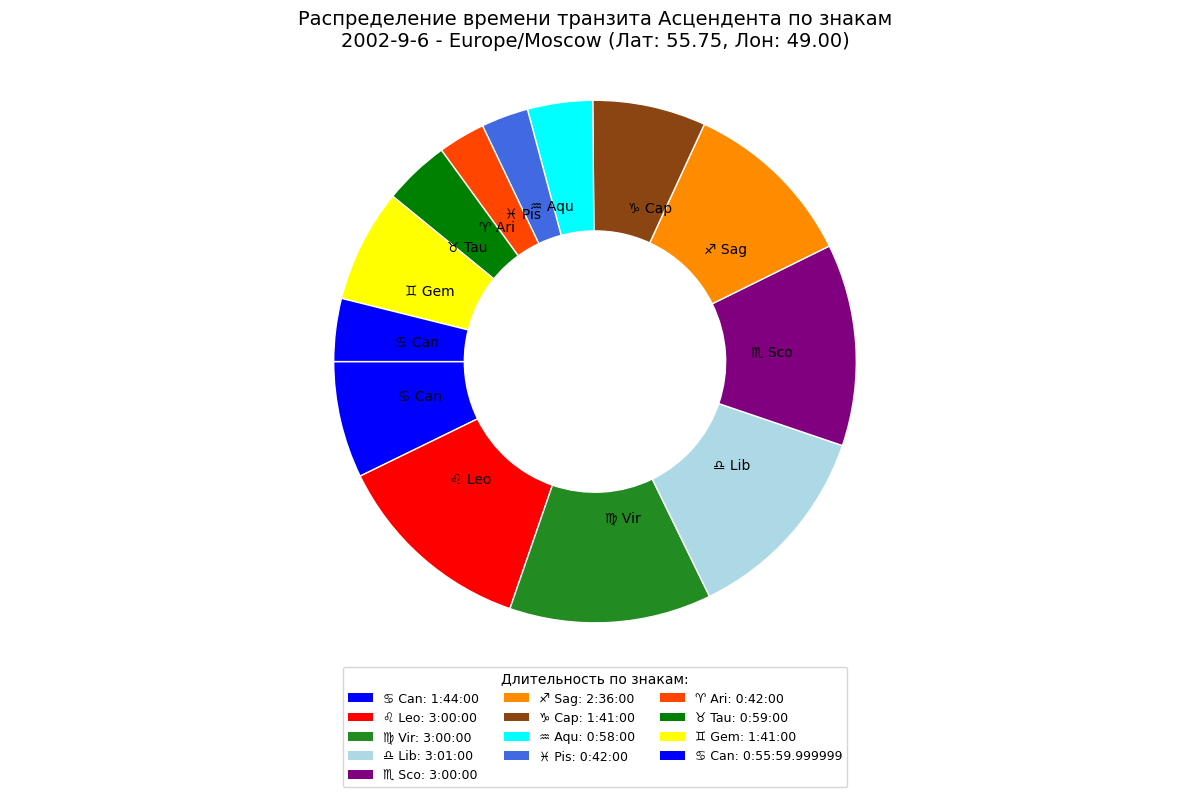

In [100]:
if asc_transits:
    labels = [f"{ZODIAC_SIGN_UNICODE.get(t['sign'], '?')} {t['sign']}" for t in asc_transits]
    sizes = [max(0, t['duration'].total_seconds()) for t in asc_transits] # Убедимся что нет отрицательных размеров
    
    try:
        # SIGN_COLORS ожидает аббревиатуры знаков: 'Ari', 'Tau', и т.д.
        pie_colors = [SIGN_COLORS[t['sign']] for t in asc_transits]
    except KeyError as e:
        print(f"Ошибка: не найден цвет для знака {e}. Использую цвета по умолчанию.")
        pie_colors = None # Matplotlib выберет цвета автоматически

    # Фильтруем сегменты с нулевой или слишком малой длительностью для лучшей диаграммы
    filtered_indices = [i for i, s in enumerate(sizes) if s > 60] # Длительность больше 1 минуты
    if not filtered_indices and sizes: # Если все очень короткие, но есть данные
        filtered_indices = [i for i, s in enumerate(sizes) if s > 0]

    if filtered_indices:
        filtered_labels = [labels[i] for i in filtered_indices]
        filtered_sizes = [sizes[i] for i in filtered_indices]
        filtered_pie_colors = [pie_colors[i] for i in filtered_indices] if pie_colors else None
    else: # Если все сегменты нулевые или их нет
        print("Нет значимых данных о транзитах для построения графика (все длительности слишком малы или нулевые).")
        filtered_labels, filtered_sizes, filtered_pie_colors = [], [], []

    if filtered_sizes:
        fig, ax = plt.subplots(figsize=(12, 9)) 
        wedges, texts = ax.pie(
            filtered_sizes,
            labels=filtered_labels,
            colors=filtered_pie_colors,
            autopct=None,
            startangle=180,
            pctdistance=0.85, 
            labeldistance=0.6,
            wedgeprops=dict(edgecolor='w', width=0.5)
        )

        for text_obj in texts: # Используем text_obj вместо text чтобы не конфликтовать с модулем text
            text_obj.set_fontsize(10)
        for autotext_obj in autotexts: # Аналогично
            autotext_obj.set_fontsize(9)
            autotext_obj.set_color('white') 

        ax.axis('equal') 
        plt.title(f"Распределение времени транзита Асцендента по знакам\n{target_date_str} - {tz_str} (Лат: {lat:.2f}, Лон: {lng:.2f})", fontsize=14, pad=20)
        
        from matplotlib.patches import Patch
        legend_elements = []
        # Легенда для отфильтрованных данных
        original_transits_for_legend = [asc_transits[i] for i in filtered_indices]
        for i, transit_info in enumerate(original_transits_for_legend):
            label = f"{ZODIAC_SIGN_UNICODE.get(transit_info['sign'], '?')} {transit_info['sign']}: {transit_info['duration_readable']}"
            color_for_legend = 'gray' 
            if filtered_pie_colors and i < len(filtered_pie_colors):
                 color_for_legend = filtered_pie_colors[i]
            legend_elements.append(Patch(facecolor=color_for_legend, label=label))
        
        if legend_elements:
            ax.legend(handles=legend_elements, title="Длительность по знакам:", loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=min(3, len(legend_elements)), fontsize=9)

        plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
        plt.show()
    elif asc_transits : # Если были транзиты, но все отфильтровались
        print("Все сегменты транзитов слишком короткие для отображения на диаграмме.")
    else: # Если изначально не было транзитов
        print("Нет данных о транзитах для построения графика.")


In [66]:
class Node:
    def __init__(self):
        self.end = False
        self.children = {}

    def autocomplete(self, prefix):
        # we're at the end of a word, yield the result
        if self.end:
            yield prefix

        # else, recurse over each child-character
        # of the current node and append the 
        # corresponding letter to the prefix
        # -> this will build up the autocompleted string
        for letter, child in self.children.items():
            yield from child.autocomplete(prefix + letter)

class Trie:
    def __init__(self):
        self.root = Node()

    def insert(self, word):
        cur = self.root
        for c in word:
            if c not in cur.children:
                cur.children[c] = Node()
            cur = cur.children[c]
        cur.end = True

    def autocomplete(self, word):
        cur = self.root
        # starting at the root
        # traverse the trie for each 
        # character in `word`
        for c in word:
            cur = cur.children.get(c)
            if cur is None:  # word does not exist in our trie
                return
        
        # recursively autocomplete all possible words
        # starting at the final character node
        yield from cur.autocomplete(word)

In [72]:
trie=Trie()
trie.insert("Nietszhe")
trie.insert('Hume')
trie.insert('Schopenhauer')
trie.insert('Russell')
trie.insert('Moore')

In [73]:
print(list(trie.autocomplete('')))

['Schopenhauer']


In [2]:
from skyfield.api import PlanetaryConstants, load

ts = load.timescale()
t = ts.utc(1969, 7, 20, 17, 40)

eph = load('de421.bsp')
earth, moon = eph['earth'], eph['moon']

pc = PlanetaryConstants()
pc.read_text(load('moon_080317.tf'))
pc.read_text(load('pck00008.tpc'))
pc.read_binary(load('moon_pa_de421_1900-2050.bpc'))

frame = pc.build_frame_named('MOON_ME_DE421')
aristarchus = moon + pc.build_latlon_degrees(frame, 0.6875, 23.4333)

planets_names = [
    'MERCURY', 'VENUS', 'EARTH', 'MARS', 
    'JUPITER BARYCENTER', 'SATURN BARYCENTER', 
    'URANUS BARYCENTER', 'NEPTUNE BARYCENTER', 'PLUTO BARYCENTER' 
]

planets = [eph[name] for name in planets_names]

for p in planets:
    apparent = aristarchus.at(t).observe(p).apparent()
    ra, dec, distance = apparent.radec(epoch='date')
    print(ra)
    print(dec)

    alt, az, distance = apparent.altaz()

    print(p)
    print(alt, 'degrees above the horizon')
    print(az, 'degrees around the horizon from north')
    print('\n\n\n')

07h 51m 03.10s
+22deg 28' 21.4"
Sum of 2 vectors:
 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 1 MERCURY BARYCENTER
 'de421.bsp' segment 1 MERCURY BARYCENTER -> 199 MERCURY
11deg 28' 44.4" degrees above the horizon
87deg 18' 10.0" degrees around the horizon from north




04h 55m 05.01s
+20deg 08' 20.4"
Sum of 2 vectors:
 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 2 VENUS BARYCENTER
 'de421.bsp' segment 2 VENUS BARYCENTER -> 299 VENUS
52deg 10' 36.2" degrees above the horizon
92deg 25' 17.5" degrees around the horizon from north




00h 21m 21.96s
+03deg 40' 21.6"
Sum of 2 vectors:
 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 3 EARTH BARYCENTER
 'de421.bsp' segment 3 EARTH BARYCENTER -> 399 EARTH
59deg 19' 23.8" degrees above the horizon
271deg 52' 05.9" degrees around the horizon from north




16h 00m 47.61s
-24deg 05' 13.1"
Sum of 2 vectors:
 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 4 MARS BARYCENTER
 'de421.bsp' segment 4 MARS BARYCENTER -> 499 MARS
-63deg 4

In [16]:
from skyfield.api import PlanetaryConstants, load, wgs84
from skyfield.framelib import ecliptic_frame
from skyfield.positionlib import Geocentric
import numpy as np

# Загрузка эфемерид и временной шкалы
ts = load.timescale()
eph = load('de421.bsp')

# Настройка лунной системы координат
pc = PlanetaryConstants()
pc.read_text(load('moon_080317.tf'))
pc.read_text(load('pck00008.tpc'))
pc.read_binary(load('moon_pa_de421_1900-2050.bpc'))

# Создаем систему координат, привязанную к Луне
frame = pc.build_frame_named('MOON_ME_DE421')

In [23]:
def find_asc_mc(t, lat, lon):
    """
    Рассчитывает ASC, MC, DSC и IC для заданной точки на Луне
    
    Args:
        t: Время в формате Skyfield
        lat: Широта на Луне в градусах
        lon: Долгота на Луне в градусах
        
    Returns:
        dict: Словарь с координатами ASC, MC, DSC и IC в эклиптической системе
    """
    # Создаем позицию наблюдателя на Луне
    moon_location = eph['moon'] + pc.build_latlon_degrees(frame, lat, lon)
    
    # Получаем позицию наблюдателя в пространстве в заданное время
    observer = moon_location.at(t)
    
    sun = eph['sun']
    earth = eph['earth']
    
    sun_pos = observer.observe(sun).apparent()
    earth_pos = observer.observe(earth).apparent()
    
    ra_mc, dec_mc, _ = earth_pos.radec(epoch='date')
    
    # Преобразуем в эклиптическую систему координат
    lon_mc = (ra_mc.hours * 15 + 180) % 360
    
    obliquity = 6.7
    
    lst = (ra_mc.hours + 6) % 24  # Местное звездное время, смещенное на 6 часов для восточного горизонта
    tan_asc = np.tan(np.radians(lst * 15)) / np.cos(np.radians(obliquity))
    lon_asc = (np.degrees(np.arctan(tan_asc)) + 90) % 360  # +90 для перехода к эклиптической долготе
    
    # DSC и IC - противоположные точки к ASC и MC
    lon_dsc = (lon_asc + 180) % 360
    lon_ic = (lon_mc + 180) % 360
    
    return {
        'ASC': lon_asc,
        'MC': lon_mc,
        'DSC': lon_dsc,
        'IC': lon_ic
    }

In [24]:
t = ts.utc(1969, 7, 20, 17, 40)  # Произвольное время
apollo11_lat = 0.6875
apollo11_lon = 23.4333

result = find_asc_mc(t, apollo11_lat, apollo11_lon)
print(f"ASC: {result['ASC']:.2f}°")
print(f"MC: {result['MC']:.2f}°")
print(f"DSC: {result['DSC']:.2f}°")
print(f"IC: {result['IC']:.2f}°")

ASC: 5.31°
MC: 185.34°
DSC: 185.31°
IC: 5.34°


In [16]:
import numpy as np
from skyfield.framelib import ecliptic_frame
from skyfield.api import PlanetaryConstants, load

earth, moon, sun = eph['earth'], eph['moon'], eph['sun']

In [18]:
# Function to compute ecliptic coordinates
def compute_ecliptic_coordinates(observer, target, t):

    astrometric = observer.at(t).observe(target)

    lon, lat, dist = astrometric.frame_latlon(ecliptic_frame)

    return lon.degrees, lat.degrees

def compute_lunar_ascendant(observer, t, num_points=360):

    ecliptic_longitudes = np.linspace(0, 360, num_points)

    ecliptic_points = []

    horizon_alts = []

    for lon in ecliptic_longitudes:

        sun_pos = sun.at(t)
        sun_lon, sun_lat, _ = sun_pos.frame_latlon(ecliptic_frame)
        
        # Здесь нужно создать объект с заданной эклиптической долготой
        # Skyfield не имеет прямого метода для этого, поэтому это приближение
        
        # Вычисляем высоту объекта над горизонтом
        apparent = observer.at(t).observe(sun).apparent()
        alt, az, _ = apparent.altaz()
        
        ecliptic_points.append((lon, alt.degrees, az.degrees))
        horizon_alts.append(alt.degrees)

    crossings = []
    
    for i in range(len(horizon_alts)-1):
        if (horizon_alts[i] < 0 and horizon_alts[i+1] >= 0) or \
           (horizon_alts[i] >= 0 and horizon_alts[i+1] < 0):
            
            # Линейная интерполяция для нахождения точного пересечения
            ratio = abs(horizon_alts[i]) / (abs(horizon_alts[i]) + abs(horizon_alts[i+1]))
            crossing_lon = ecliptic_longitudes[i] * (1 - ratio) + ecliptic_longitudes[i+1] * ratio
            crossing_az = ecliptic_points[i][2] * (1 - ratio) + ecliptic_points[i+1][2] * ratio
            
            crossings.append((crossing_lon, crossing_az))

    if crossings:
        east_crossing = min(crossings, key=lambda x: abs(x[1] - 90))
        return east_crossing[0]  # Долгота асцендента
    
    return None  # Не найдено пересечение (маловероятно)

In [19]:
lunar_asc = compute_lunar_ascendant(aristarchus, t)
print(f"Лунный асцендент (приближение): {lunar_asc}°")

Лунный асцендент (приближение): None°


In [ ]:
lunar_asc = compute_lunar_ascendant(aristarchus, t)
print(f"Лунный асцендент (приближение): {lunar_asc}°")

Лунный асцендент (приближение): None°
